In [1]:
import pandas as pd
from tabulate import tabulate

In [2]:
run_1 = pd.read_csv('new-yorker-1.csv')
run_2 = pd.read_csv('new-yorker-2.csv')

In [3]:
data = run_1.append(run_2)

In [4]:
counts = data[['author', 'link']].groupby(['author']).count()

In [5]:
table = counts.sort_values(by=['link'], ascending=False).head(10)

In [21]:
print(tabulate(table, ['Author', '# of Stories'], tablefmt="html"))

<table>
<thead>
<tr><th>Author                </th><th style="text-align: right;">  # of Stories</th></tr>
</thead>
<tbody>
<tr><td>S. J. Perelman        </td><td style="text-align: right;">           271</td></tr>
<tr><td>James Thurber         </td><td style="text-align: right;">           270</td></tr>
<tr><td>John O'Hara           </td><td style="text-align: right;">           226</td></tr>
<tr><td>Frank Sullivan        </td><td style="text-align: right;">           191</td></tr>
<tr><td>W. E. Farbstein       </td><td style="text-align: right;">           184</td></tr>
<tr><td>E. B. White           </td><td style="text-align: right;">           179</td></tr>
<tr><td>John Updike           </td><td style="text-align: right;">           169</td></tr>
<tr><td>Sylvia Townsend Warner</td><td style="text-align: right;">           152</td></tr>
<tr><td>Arthur Kober          </td><td style="text-align: right;">           151</td></tr>
<tr><td>Wolcott Gibbs         </td><td style="text-align:

In [12]:
data.to_csv('new-yorker-full.csv', index=False)

## Analysis

In [20]:
data['link'].count()

13290

In [21]:
data['author'].nunique()

2327

In [10]:
ordered = counts.sort_values(by=['link'], ascending=False)

In [24]:
ordered[ordered.link == 1].count()   

link    1245
dtype: int64

In [26]:
1245 / 2327

0.5350236355822948

In [11]:
heights = [i for i in ordered['link'] if i > 10]

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

Text(0.5,0,'Number of Publications')

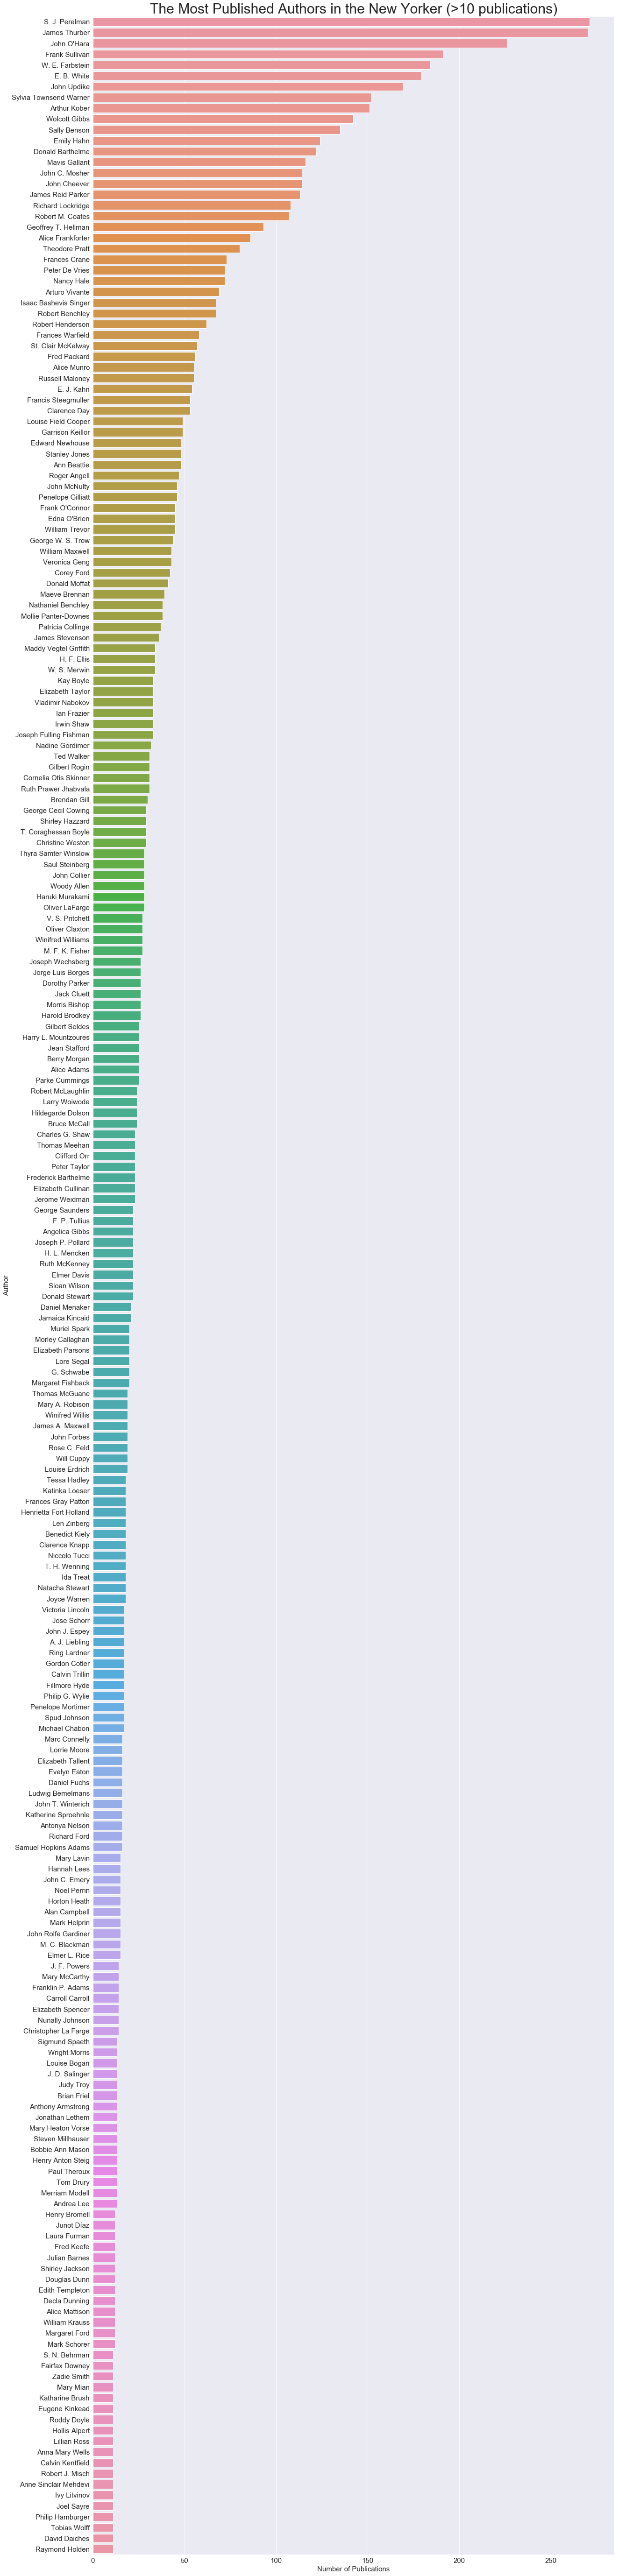

In [68]:
plt.figure(figsize=(20,100))
plt.title('The Most Published Authors in the New Yorker (>10 publications)', fontsize=30)
sns.barplot(y=ordered.index.values.tolist()[:len(heights)], x=heights)
sns.set_style('darkgrid')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('Author', fontsize=15)
plt.xlabel('Number of Publications',fontsize=15)

In [13]:
import plotly.graph_objs as go
import plotly.plotly as py

In [18]:
graph_data = [go.Bar(
            x=heights[::-1],
            y=ordered.index.values.tolist()[:len(heights)][::-1],
            orientation = 'h',
            marker=dict(
                color='rgba(50, 171, 96, 0.6)',
                line=dict(
                    color='rgba(50, 171, 96, 1.0)',
                    width=1),),
            name='The Most Published Authors in the New Yorker (>10 Publications)'
    
    )]
layout = go.Layout(
    title='The Most Published Authors in the New Yorker (>10 Publications)',
    xaxis=dict(
        title='Number of Published Stories'
    ),
    autosize=False,
    width=590,
    height=2500,
    margin=go.Margin(
        l=180
    ),
    paper_bgcolor='white',
    plot_bgcolor='white'
)

fig = go.Figure(data=graph_data, layout=layout)

py.iplot(fig, filename='new-yorker')

C:\ProgramData\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:396: DeprecationWarning:

plotly.graph_objs.Margin is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.Margin


